In [ ]:
# Описание
# На этот раз данные имеют следующую структуру:

# записываются для каждого пользователя, совершившего покупки, каждый день
# для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
# внутри каждой папки есть файл data.csv, где и хранятся данные
# Схематично выглядит так:

# └── data
#    ├── 2020-12-30
#    │  ├── FirstName_LastName1
#    │  │   └── data.csv
#    │  ├── FirstName_LastName2
#    │  │   └── data.csv
#    │  └── FirstName_LastName3
#    │      └── data.csv
#    └── 2020-12-31
#       ├── FirstName_LastName1
#       │   └── data.csv
#       └── FirstName_LastName5
#           └── data.csv
        
#  Задачи
# Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity),
# а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
#  Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и 
# в алфавитном порядке.
#  Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с 
# product_id==56?
#  Визуализируйте продажи по дням.
#  Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с 
# одинаковым product_id, совершенную в разные дни. 


In [130]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/'

In [49]:
list = []
for paths, dirs, files in os.walk(path):
    if paths.endswith('v'):
        list.append(paths)
print(list)

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-juhimenko/shared/homeworks

In [102]:
#df = pd.read_csv(list[0] + '/' + 'data.csv', names = ['product_id', 'quantity'], skiprows = [0])
#df['name'] = list[0].split('/')[-1]
#df['date']= list[0].split('/')[-2]
#df

In [92]:
data = {'product_id': np.nan, 'quantity':np.nan, 'name':np.nan, 'date': np.nan}

In [93]:
df_new = pd.DataFrame(data, columns = ['product_id', 'quantity', 'name', 'date'], index = [0])
df_new


,product_id,quantity,name,date
0,NaN,NaN,NaN,NaN


In [96]:
#pd.concat([df_new, df], ignore_index = True)

,product_id,quantity,name,date
0,NaN,NaN,NaN,NaN
1,27,4,Petr_Ivanov,2020-12-05
2,89,1,Petr_Ivanov,2020-12-05
3,33,2,Petr_Ivanov,2020-12-05
4,8,3,Petr_Ivanov,2020-12-05
5,16,1,Petr_Ivanov,2020-12-05


In [97]:
df_new = pd.DataFrame(data, columns = ['product_id', 'quantity', 'name', 'date'], index = [0])

for i in range(len(list)):
    df = pd.read_csv(list[i] + '/' + 'data.csv', names = ['product_id', 'quantity'], skiprows = [0])
    df['name'] = list[i].split('/')[-1]
    df['date']= list[i].split('/')[-2]
    my_df = pd.concat([df_new, df], ignore_index = True)
    df_new = my_df
print(df_new)    

    product_id quantity            name        date
0          NaN      NaN             NaN         NaN
1           27        4     Petr_Ivanov  2020-12-05
2           89        1     Petr_Ivanov  2020-12-05
3           33        2     Petr_Ivanov  2020-12-05
4            8        3     Petr_Ivanov  2020-12-05
..         ...      ...             ...         ...
157         18        4    Petr_Fedorov  2020-12-07
158         94        4    Petr_Fedorov  2020-12-07
159         95        2  Vasiliy_Ivanov  2020-12-07
160         83        3  Vasiliy_Ivanov  2020-12-07
161         64        1  Vasiliy_Ivanov  2020-12-07

[162 rows x 4 columns]


In [153]:
df_new = df_new.dropna()
df_new.head()

,product_id,quantity,name,date
1,27,4,Petr_Ivanov,2020-12-05
2,89,1,Petr_Ivanov,2020-12-05
3,33,2,Petr_Ivanov,2020-12-05
4,8,3,Petr_Ivanov,2020-12-05
5,16,1,Petr_Ivanov,2020-12-05


In [101]:
df_new.quantity.sum()

480

In [144]:
df_top = df_new.groupby('date', as_index = False).quantity.sum().sort_values('quantity', ascending = False)
df_top.date = pd.to_datetime(df_top.date)
df_top.date = df_top.date.dt.strftime('%d')
df_top

,date,quantity
1,04,113
4,07,94
6,09,69
5,08,68
2,05,61
0,03,60
3,06,15


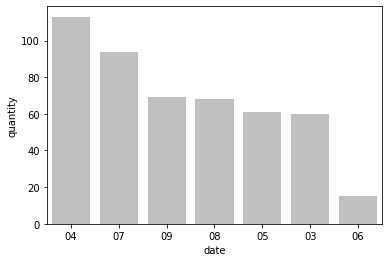

In [145]:
sns.barplot(data = df_top, x = 'date', y = 'quantity', color = 'grey', alpha = 0.5)

In [121]:
df_new.groupby('name', as_index = False).agg({'quantity': 'sum'}).sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21
